In [1]:
# Cargar modulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

flights = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/flights_Clase3_PIT118.csv")

# Preprocesamiento

In [2]:
# Nombres de las columnas
flights.columns

Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')

In [4]:
# Valores faltantes : Expresemos esta informacion como porcentajes
flights.isnull().sum()*100/flights.shape[0]

MONTH        0.000000
DAY          0.000000
WEEKDAY      0.000000
AIRLINE      0.000000
ORG_AIR      0.000000
DEST_AIR     0.000000
SCHED_DEP    0.000000
DEP_DELAY    1.424126
AIR_TIME     1.740409
DIST         0.000000
SCHED_ARR    0.000000
ARR_DELAY    1.740409
DIVERTED     0.000000
CANCELLED    0.000000
dtype: float64

In [5]:
# Modulo missingno
import missingno

<Axes: >

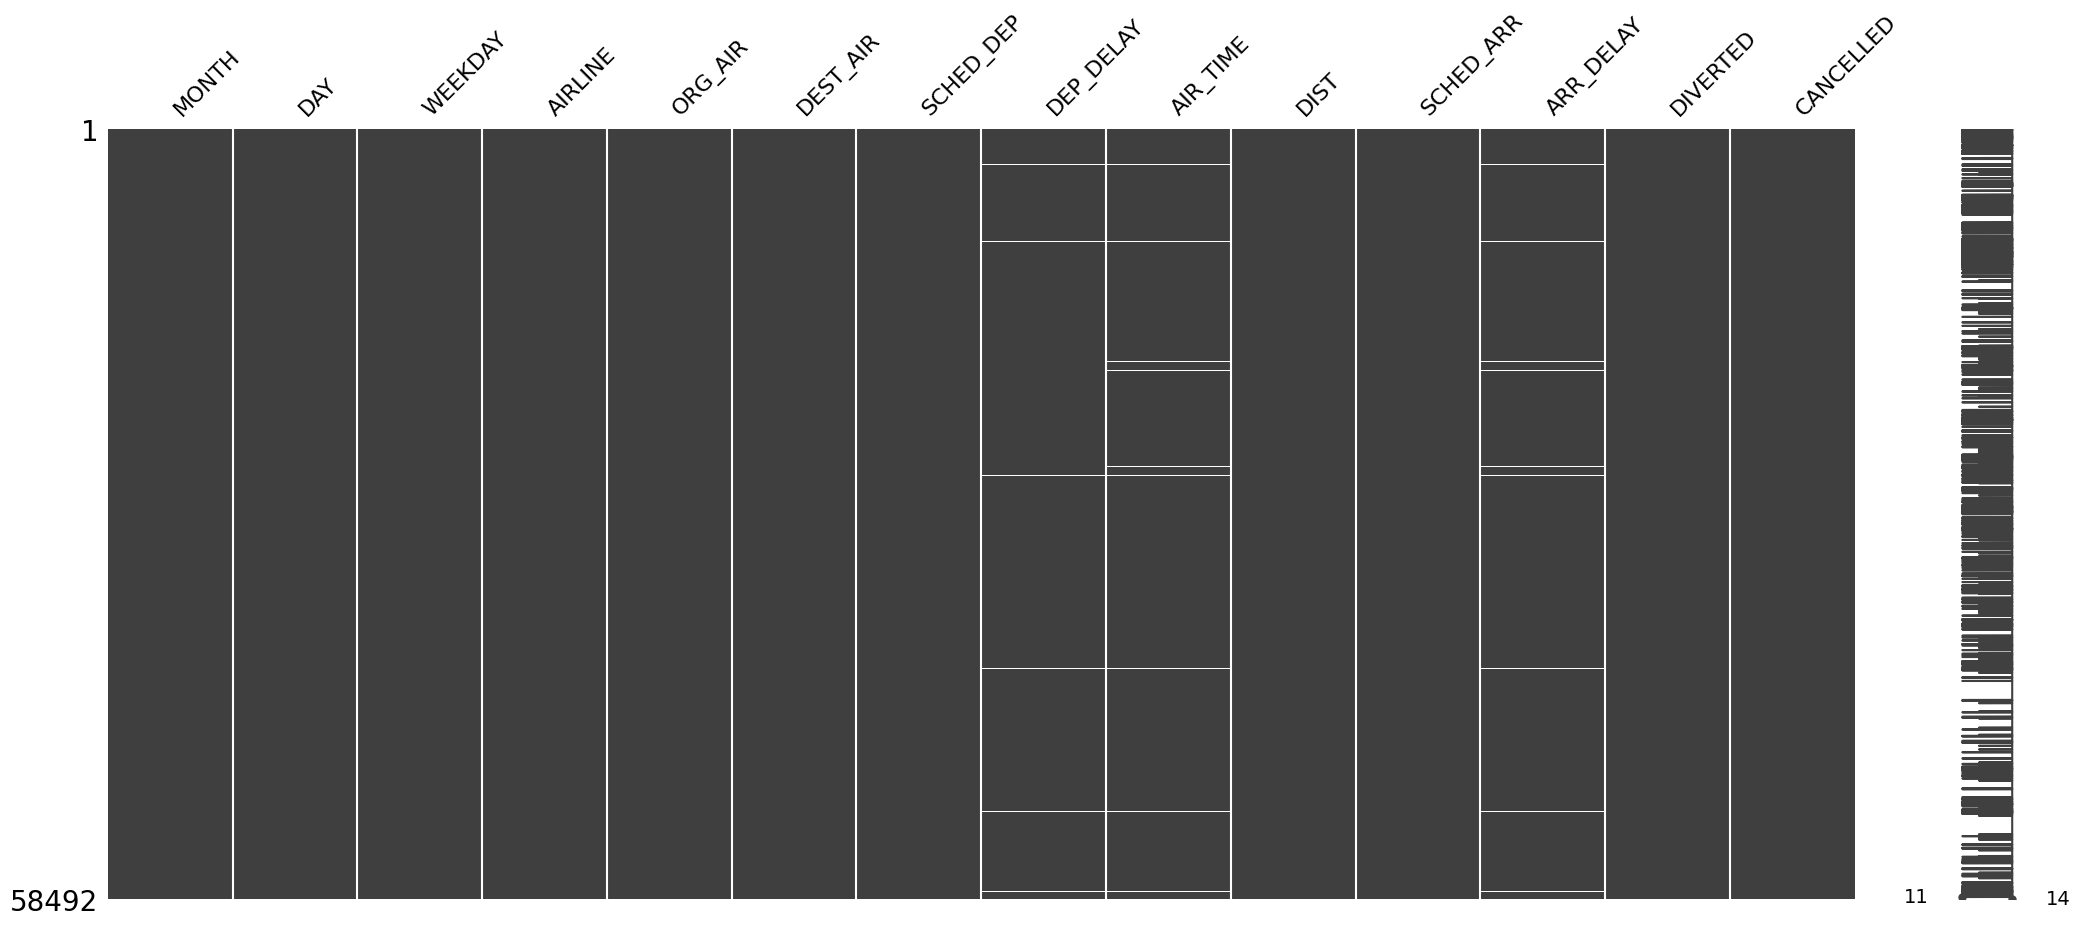

In [6]:
# Grafico de los datos faltantes
missingno.matrix(flights)

In [8]:
# Tarea : Arreglar/rellenar los valores faltantes de las 3 columnas :
  # DEP_DELAY
  # AIR_TIME
  # ARR_DELAY

print(flights[["DEP_DELAY", "AIR_TIME", "ARR_DELAY"]].dtypes)
# Conclusion : Todas las variables/columnas/features con valores faltantes (missing values)
# son datos de tipo punto flotante

DEP_DELAY    float64
AIR_TIME     float64
ARR_DELAY    float64
dtype: object


# El metodo groupby

In [9]:
# El metodo info
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


In [ ]:
# Agrupacion : Consideremos una variable cualitativa (object/category)
# Por ejemplo : AIRLINE

# Agregar : Consideremos una variable cuantitativa
# Por ejemplo : ARR_DELAY

# Funcion de agregacion : mean



In [11]:
# Variable AIRLINE

# Numero de niveles de la variable AIRLINE
flights.AIRLINE.nunique()

14

In [12]:
# Variable AIRLINE

# Moda
flights.AIRLINE.mode()[0]

'DL'

In [19]:
# Apliquemos groupby
MeanAirLine_ArrDelay = flights.groupby("AIRLINE").agg({"ARR_DELAY": "mean"})
MeanAirLine_ArrDelay

ARR_DELAY
AIRLINE           
AA        5.542661
AS       -0.833333
B6        8.692593
DL        0.339691
EV        7.034580
F9       13.630651
HA        4.972973
MQ        6.860591
NK       18.436070
OO        7.593463
UA        7.765755
US        1.681105
VX        5.348884
WN        6.397353

In [21]:
MeanAirLine_ArrDelay.sort_values(by = "ARR_DELAY")

ARR_DELAY
AIRLINE           
AS       -0.833333
DL        0.339691
US        1.681105
HA        4.972973
VX        5.348884
AA        5.542661
WN        6.397353
MQ        6.860591
EV        7.034580
OO        7.593463
UA        7.765755
B6        8.692593
F9       13.630651
NK       18.436070

In [27]:
# Otra forma : Obtener un dato de tipo Series
flights.groupby("AIRLINE")["ARR_DELAY"].agg("mean")

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

In [28]:
# Otra forma de alimentar el calculo hecho por la funcion de agrupacion
flights.groupby("AIRLINE").agg({"ARR_DELAY":np.mean})

ARR_DELAY
AIRLINE           
AA        5.542661
AS       -0.833333
B6        8.692593
DL        0.339691
EV        7.034580
F9       13.630651
HA        4.972973
MQ        6.860591
NK       18.436070
OO        7.593463
UA        7.765755
US        1.681105
VX        5.348884
WN        6.397353

In [30]:
# La suma
flights.groupby("AIRLINE").agg({"ARR_DELAY":np.sum}).sort_values(by = "ARR_DELAY")

ARR_DELAY
AIRLINE           
AS          -640.0
HA           552.0
US          2678.0
DL          3580.0
B6          4694.0
VX          5274.0
F9         17788.0
MQ         22736.0
NK         27396.0
EV         40076.0
AA         48332.0
OO         48788.0
WN         53162.0
UA         59641.0

In [38]:
# Obtengamos un objeto de timpo Series
flights.groupby("AIRLINE")["ARR_DELAY"].agg(np.max).sort_values()

AIRLINE
VX     236.0
HA     298.0
B6     331.0
AS     344.0
MQ     357.0
US     431.0
NK     474.0
WN     493.0
EV     669.0
OO     724.0
DL     741.0
F9     839.0
AA     858.0
UA    1185.0
Name: ARR_DELAY, dtype: float64

In [41]:
# Observacion 1
grouped1 = flights.groupby("AIRLINE")


In [42]:
type(grouped1)

pandas.core.groupby.generic.DataFrameGroupBy

In [43]:
# Lista de metodos
dir(grouped1)

['AIRLINE',
 'AIR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'DAY',
 'DEP_DELAY',
 'DEST_AIR',
 'DIST',
 'DIVERTED',
 'MONTH',
 'ORG_AIR',
 'SCHED_ARR',
 'SCHED_DEP',
 'WEEKDAY',
 '_DataFrameGroupBy__examples_dataframe_doc',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_examples_doc',
 '_agg_general',
 '_agg_py_fallback',
 '_aggregate_frame',
 '_aggregate_with_numba',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_ascending_count',
 '_bool_agg',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '

In [45]:
# Observacion2
# Una funcion de agregacion es basicamente una funcion que recibe muchos valores
# y devuelve un solo valor ("representante")

# Consideremos la funcion np.sqrt
flights.groupby("AIRLINE")["ARR_DELAY"].agg(np.sin)

ValueError: Must produce aggregated value

In [49]:
# El numero de elementos por cada grupo
flights.groupby("AIRLINE").agg({"ARR_DELAY":"count"}).sort_values(by = "ARR_DELAY", ascending= False)

ARR_DELAY
AIRLINE           
DL           10539
AA            8720
WN            8310
UA            7680
OO            6425
EV            5697
MQ            3314
US            1593
NK            1486
F9            1305
VX             986
AS             768
B6             540
HA             111

In [54]:
# ORG_AIR : Aeropuertos de Origen
# AIR_TIME : Tiempo en el aire


# Calculemos el promedio  de tiempo de vuelo en funcion del aeropuerto de origen
flights.groupby("ORG_AIR").agg({"AIR_TIME": np.sum}).sort_values(by = "AIR_TIME")

AIR_TIME
ORG_AIR          
MSP      381976.0
IAH      483351.0
LAS      508960.0
PHX      562179.0
SFO      637435.0
DEN      662817.0
DFW      747103.0
ORD      827236.0
LAX      911135.0
ATL      940687.0

## Agrupar y agregar con multiples columnas de agregacion

In [60]:
# Deseo encontrar/calcular el numero de vuelos cancelados (CANCELLED)
# para cada aerolinea por dia de la semana
grouped2 = flights.groupby(["AIRLINE", "WEEKDAY"]).agg({"CANCELLED":"sum"})
grouped2

# El objeto grouped2 es lo que considera un MultiIndex


CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

In [61]:
grouped2.shape

(98, 1)

In [62]:
# La mejor forma de obtener la informacionde grouped2 es reseteando los indices
grouped2 = grouped2.reset_index()
grouped2

AIRLINE  WEEKDAY  CANCELLED
0       AA        1         41
1       AA        2          9
2       AA        3         16
3       AA        4         20
4       AA        5         18
..     ...      ...        ...
93      WN        3         18
94      WN        4         10
95      WN        5          7
96      WN        6         10
97      WN        7          7

[98 rows x 3 columns]

In [64]:
# Como se distribuyen los vuelos cancelados para al aerolinea "DL"
grouped2.loc[grouped2.AIRLINE == "DL", :]

AIRLINE  WEEKDAY  CANCELLED
21      DL        1         10
22      DL        2          8
23      DL        3          8
24      DL        4          3
25      DL        5          3
26      DL        6          4
27      DL        7          2

In [67]:
# Variables cualitativas para agrupar :
  # AIRLINE
  # WEEKDAY

# Variables cuantitativas para agregar
  # CANCELLED : Numero de vuelos cancelados
  # DIVERTED : Numero de vuelos desviados

# Deseo calcular el numero y el promedio de vuelos cancelados (CANCELLED) y vuelos desviados (DIVERTED)
# para cada aerolinea (AIRLINE) y por el dia de la semana  (WEEKDAY)

flights.groupby(["AIRLINE", "WEEKDAY"]).agg({"CANCELLED": "sum", "DIVERTED":"mean"})

CANCELLED  DIVERTED
AIRLINE WEEKDAY                     
AA      1               41  0.004699
        2                9  0.001631
        3               16  0.001494
        4               20  0.003751
        5               18  0.000786
...                    ...       ...
WN      3               18  0.001569
        4               10  0.003165
        5                7  0.000000
        6               10  0.003040
        7                7  0.002600

[98 rows x 2 columns]

In [70]:
flights.groupby(["AIRLINE", "WEEKDAY"])[["CANCELLED", "DIVERTED"]].agg(["sum", "mean"])

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [73]:
# PAra cada aeropuerto de origen (ORG_AIR) y aeropuerto de destino (DEST_AIR)
# encontrar el numero total de vuelos, el numero y promedio de vuelos cancelados
# (CANCELLED). Asi como el promedio y varianza del tiempo en el aire (AIR_TIME)

flights.groupby(["ORG_AIR", "DEST_AIR"]).agg({
    "CANCELLED" :["sum", "mean", "size"],
    "AIR_TIME":["mean", "var"]
})

CANCELLED                   AIR_TIME            
                       sum      mean size        mean         var
ORG_AIR DEST_AIR                                                 
ATL     ABE              0  0.000000   31   96.387097   45.778495
        ABQ              0  0.000000   16  170.500000   87.866667
        ABY              0  0.000000   19   28.578947    6.590643
        ACY              0  0.000000    6   91.333333   11.466667
        AEX              0  0.000000   40   78.725000   47.332692
...                    ...       ...  ...         ...         ...
SFO     SNA              4  0.032787  122   64.059322   11.338331
        STL              0  0.000000   20  198.900000  101.042105
        SUN              0  0.000000   10   78.000000   25.777778
        TUS              0  0.000000   20  100.200000   35.221053
        XNA              0  0.000000    2  173.500000    0.500000

[1130 rows x 5 columns]

# Visualizacion

In [74]:
# AIRLINE : Aerolineas
flights.loc[:, "AIRLINE"].nunique()

14

In [76]:
# Numero de vuelos por aerolinea
flights.AIRLINE.value_counts()

AIRLINE
DL    10601
AA     8900
WN     8418
UA     7792
OO     6588
EV     5858
MQ     3471
US     1615
NK     1516
F9     1317
VX      993
AS      768
B6      543
HA      112
Name: count, dtype: int64

In [77]:
# NUmero de vuelos por aerolinea como porcentaje
flights.AIRLINE.value_counts()*100/flights.shape[0]

AIRLINE
DL    18.123846
AA    15.215756
WN    14.391712
UA    13.321480
OO    11.263079
EV    10.015045
MQ     5.934145
US     2.761061
NK     2.591807
F9     2.251590
VX     1.697668
AS     1.313000
B6     0.928332
HA     0.191479
Name: count, dtype: float64

<Axes: xlabel='AIRLINE'>

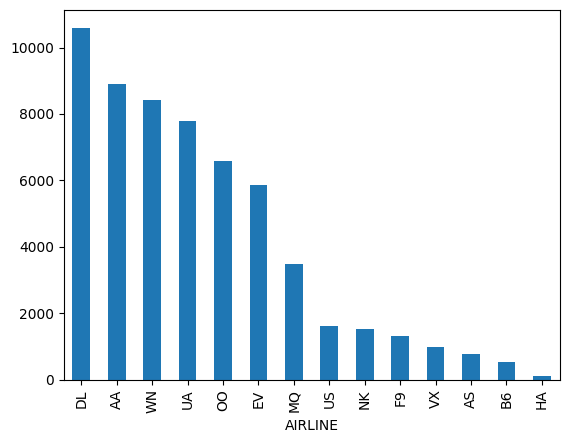

In [79]:
# Dada la informacion obtenida mediante el metodo value_counts , podemos mostrar
# esta informacion usando un diagrama de barras
flights["AIRLINE"].value_counts().plot(kind = "bar")

<Axes: xlabel='AIRLINE'>

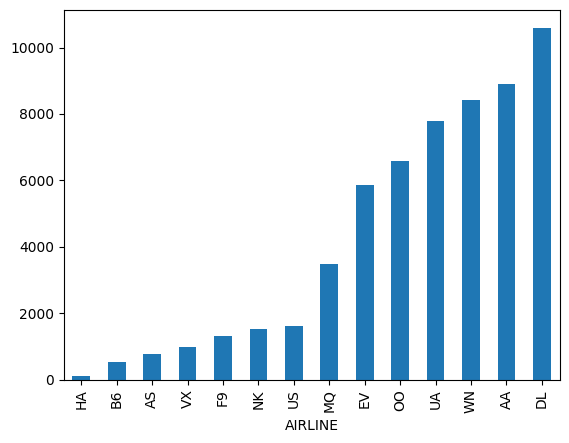

In [80]:
# Modifiquemos el grafico anterior mostrando la barras en orden acendente
flights["AIRLINE"].value_counts(ascending= True).plot(kind = "bar")

<Axes: ylabel='AIRLINE'>

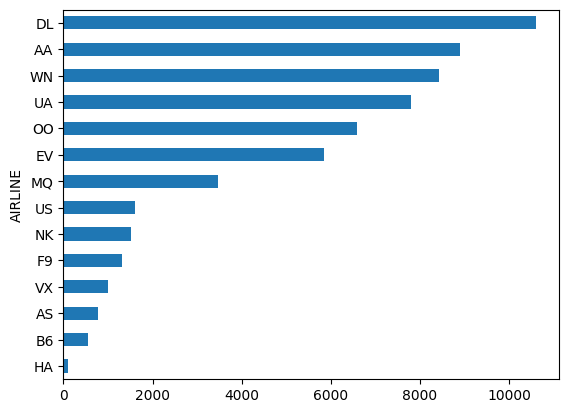

In [81]:
# MOdifiquemos el grafico anterior : usando barras horizontales
flights["AIRLINE"].value_counts(ascending= True).plot(kind = "barh")

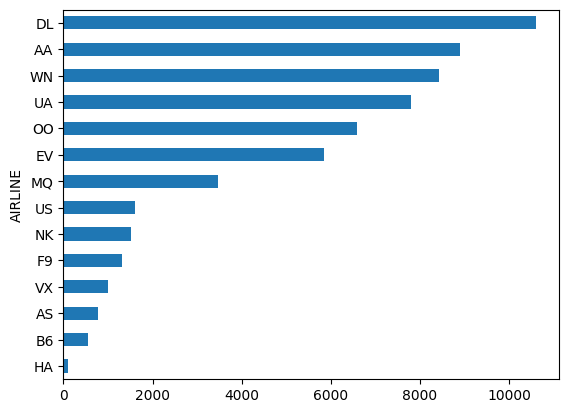

In [82]:
# Mejora 1
# Eliminemos <Axes: ylabel='AIRLINE'>
flights["AIRLINE"].value_counts(ascending= True).plot(kind = "barh")
plt.show()

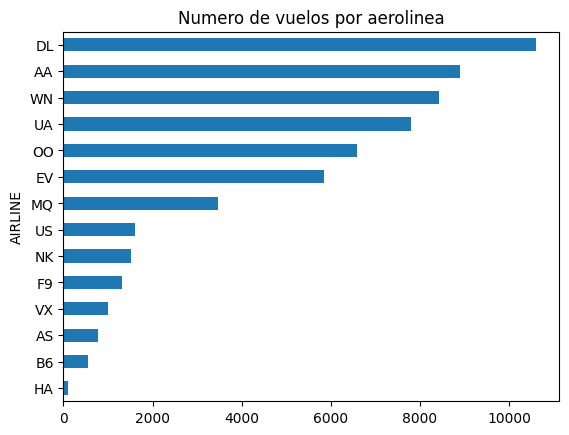

In [83]:
# Mejora2
# Agreguemos un titulo a nuestro grafico anterior
flights["AIRLINE"].value_counts(ascending= True).plot(kind = "barh",
                                                      title = "Numero de vuelos por aerolinea")
plt.show()

In [84]:
flights["AIRLINE"].value_counts(ascending= True)

AIRLINE
HA      112
B6      543
AS      768
VX      993
F9     1317
NK     1516
US     1615
MQ     3471
EV     5858
OO     6588
UA     7792
WN     8418
AA     8900
DL    10601
Name: count, dtype: int64

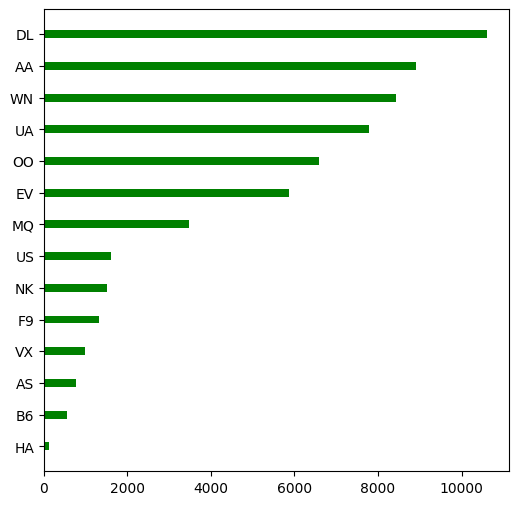

In [108]:
#  Forma mas personalizable de mostrar nuestro diagrama de barras
  # Definir un objeto para la ventana/figura : fig
  # Definir un objeto para manipular los ejes : ax
fig, ax = plt.subplots(figsize = (6,6))

# Definamos los argumentos de mi diagrama de barras
x = flights.AIRLINE.value_counts(ascending=True).index.values
y = flights.AIRLINE.value_counts(ascending=True)

# En el objeto ax deseo colocar el diagrama de barras
ax.barh(x,y,height= 0.25,
        color = "green")

# Siempre la ultima de un grafico es :
plt.show()

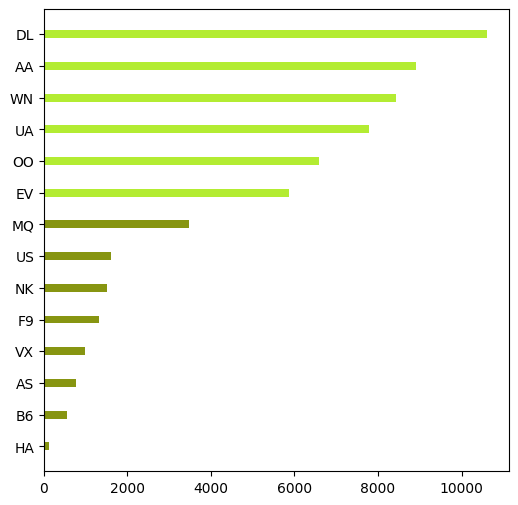

In [115]:
# Mejoremos el grafico anterior :
  # Regla de construccion de los colores :
    # > 5000 de color verde
    # <= 5000 de color amarillo

# Necesitamos construir una lista de colores
ListaColores = []
for valor in flights.AIRLINE.value_counts(ascending=True).values:
  if valor >5000 :
    ListaColores.append("#B3EC32")
  else:
    ListaColores.append("#879511")

fig, ax = plt.subplots(figsize = (6,6))

# Definamos los argumentos de mi diagrama de barras
x = flights.AIRLINE.value_counts(ascending=True).index.values
y = flights.AIRLINE.value_counts(ascending=True)

# En el objeto ax deseo colocar el diagrama de barras
ax.barh(x,y,height= 0.25,
        color = ListaColores)

# Siempre la ultima de un grafico es :
plt.show()



<ipython-input-129-14cab43d1737>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45,


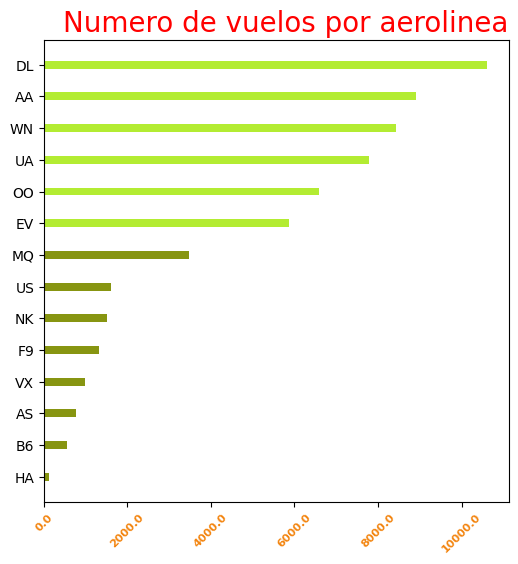

In [129]:
# Otra mejora a nuestro grafico anterior : Coloquemos  un titulo


fig, ax = plt.subplots(figsize = (6,6))

# Definamos los argumentos de mi diagrama de barras
x = flights.AIRLINE.value_counts(ascending=True).index.values
y = flights.AIRLINE.value_counts(ascending=True)

# En el objeto ax deseo colocar el diagrama de barras
ax.barh(x,y,height= 0.25,
        color = ListaColores)

# El titulo se encuentra el el eje : ax
ax.set_title("Numero de vuelos por aerolinea",
             {"fontsize": 20},
              color = "red",
              loc = "right")

# Modifiquemos los ticks (eje-X : xticks / eje-Y : yticks)
ax.xaxis.set_tick_params(labelsize = 8, labelcolor = "#F38510")
ax.yaxis.set_tick_params(labelsize = 10)

# Rotemos los xticks
ax.set_xticklabels(ax.get_xticks(), rotation = 45,
                   weight = "bold")

# Siempre la ultima de un grafico es :
plt.show()

<ipython-input-145-3d066c521bea>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45,


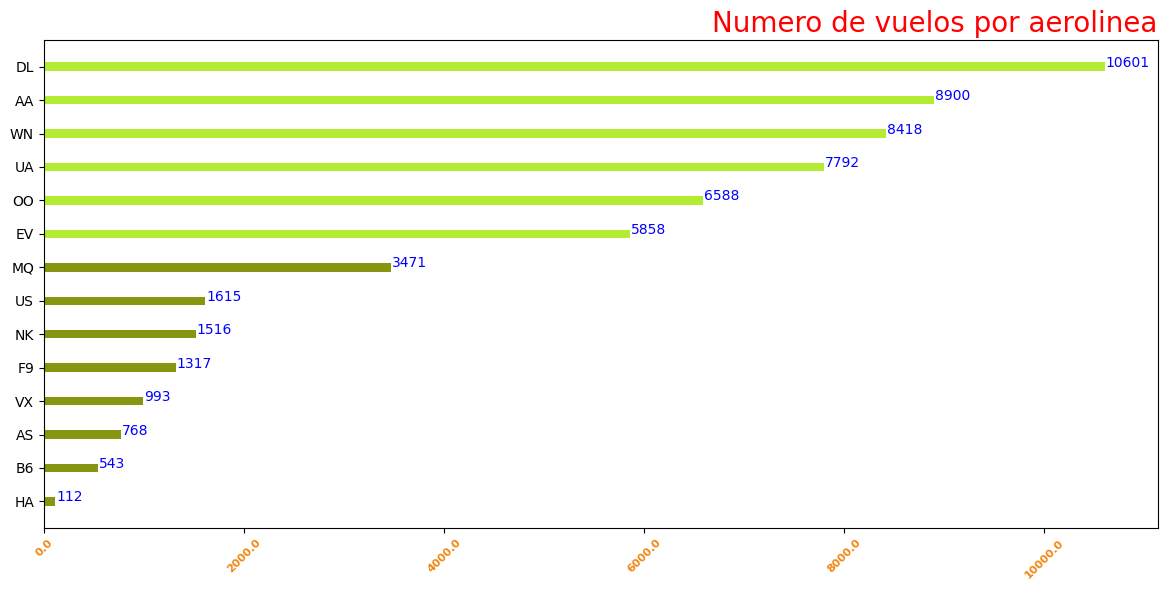

In [145]:
# Al grafico anterior agreguemos el numero de vuelos en cada barrita


fig, ax = plt.subplots(figsize = (6,6))

# Definamos los argumentos de mi diagrama de barras
x = flights.AIRLINE.value_counts(ascending=True).index.values
y = flights.AIRLINE.value_counts(ascending=True)

# En el objeto ax deseo colocar el diagrama de barras
ax.barh(x,y,height= 0.25,
        color = ListaColores)

# El titulo se encuentra el el eje : ax
ax.set_title("Numero de vuelos por aerolinea",
             {"fontsize": 20},
              color = "red",
              loc = "right")

# Modifiquemos los ticks (eje-X : xticks / eje-Y : yticks)
ax.xaxis.set_tick_params(labelsize = 8, labelcolor = "#F38510")
ax.yaxis.set_tick_params(labelsize = 10)

# Rotemos los xticks
ax.set_xticklabels(ax.get_xticks(), rotation = 45,
                   weight = "bold")

# Coloquemos el numero de vuelos por aerolinea
for i, v in enumerate(y):
  ax.text(v+ 10, i , v , color = "blue")

#
plt.tight_layout(rect = (0,0,2,1))

# Siempre la ultima de un grafico es :
plt.show()

# Mostremos otra informacion

In [148]:

# Deseo calcular el numero y el promedio de vuelos cancelados (CANCELLED) y vuelos desviados (DIVERTED)
# para cada aerolinea (AIRLINE) y por el dia de la semana  (WEEKDAY)

data1 = flights.groupby(["AIRLINE", "WEEKDAY"]).agg({"CANCELLED": "sum", "DIVERTED":"mean"}).reset_index()
data1

AIRLINE  WEEKDAY  CANCELLED  DIVERTED
0       AA        1         41  0.004699
1       AA        2          9  0.001631
2       AA        3         16  0.001494
3       AA        4         20  0.003751
4       AA        5         18  0.000786
..     ...      ...        ...       ...
93      WN        3         18  0.001569
94      WN        4         10  0.003165
95      WN        5          7  0.000000
96      WN        6         10  0.003040
97      WN        7          7  0.002600

[98 rows x 4 columns]

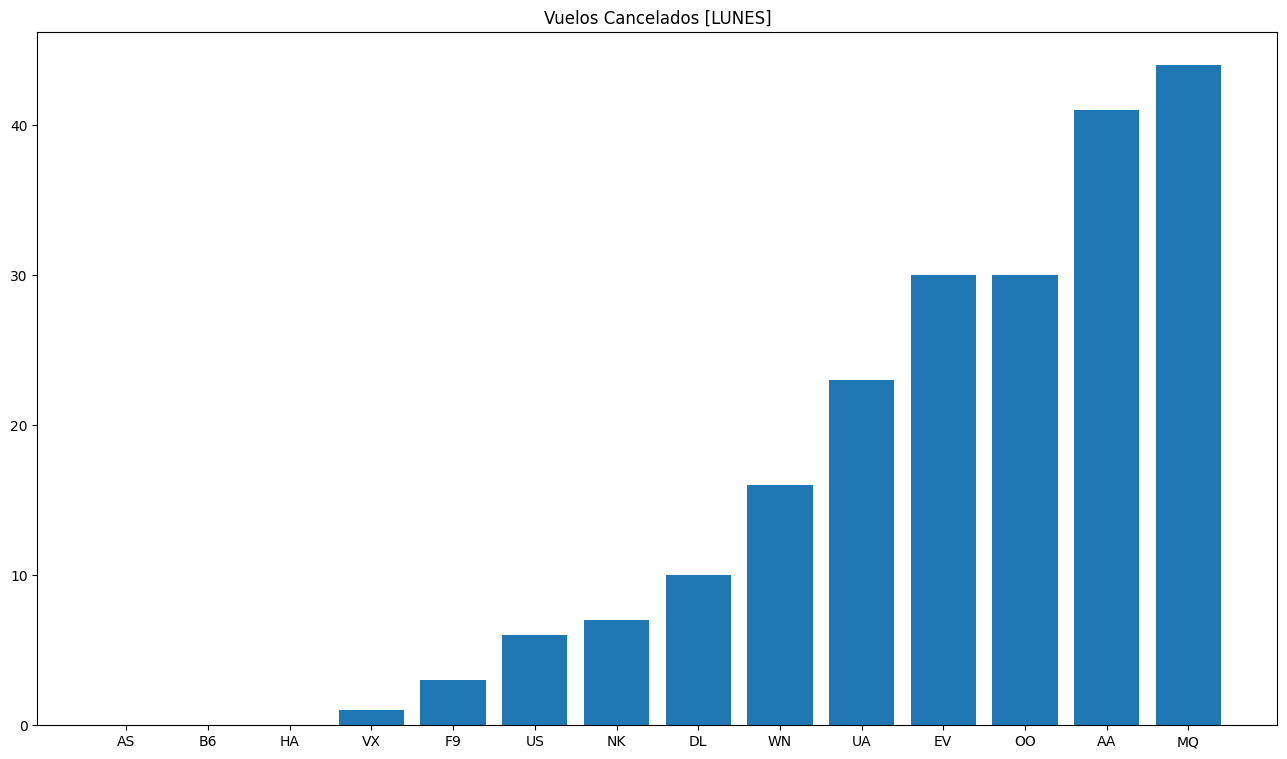

In [161]:
# Que ocurre los lunes con respecto a los vuelos cancelados para todas als aerolineas

Lunes = data1.loc[data1.WEEKDAY ==1 , ["AIRLINE", "CANCELLED"]].sort_values(by = "CANCELLED")


x = Lunes["CANCELLED"]
y = Lunes["AIRLINE"]

fig, ax = plt.subplots(figsize = (16,9))
ax.bar(y,x)
ax.set_title("Vuelos Cancelados [LUNES]")

# Guardemos el grafico en disco duro
plt.savefig("Lunes_Cancelados.png")

plt.show()



In [171]:

# Diccionario para los dias de la semana
DiasSemana = {1:"Lunes",
              2:"Martes",
              3:"Miercoles",
              4:"Jueves",
              5:"Viernes",
              6:"Sabado",
              7:"Domingo"}


# Desactivamos la interactividad de pyplot
plt.ioff()
for i in range(1,8):
  diaSemana = data1.loc[data1.WEEKDAY ==i , ["AIRLINE", "CANCELLED"]].sort_values(by = "CANCELLED")
  x = diaSemana["CANCELLED"]
  y = diaSemana["AIRLINE"]

  fig, ax = plt.subplots(figsize = (16,9))
  ax.bar(y,x)

  titulo = "Vuelos Cancelados ["+DiasSemana[i]+"]"
  ax.set_title(titulo)

  # Guardemos el grafico en disco duro
  ArchivoDiscoDuro = "Vuelos_Cancelados_[Dia" + str(i)+"].png"
  plt.savefig(ArchivoDiscoDuro)

  # plt.show()

# Activamos la interactividad de pyplot
plt.ion()
